In [1]:
!pip install pandas
!pip install sklearn
!pip install seaborn
!pip install textdistance
!pip install networkx
!pip install markov_clustering
!pip install mlxtend

In [2]:
import pandas as pd
import markov_clustering as mc
import networkx as nx
import textdistance
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [8]:
levenstein = textdistance.levenshtein
jaro_winkler = textdistance.jaro_winkler
jaccard = textdistance.jaccard
monge_elkan = textdistance.monge_elkan

In [60]:
cora = pd.read_csv("cora.csv", header=None, names=["trash1", "id", "authors", "trash2", "name", 
                                                   "trash3", "venue", "city", "venue2", "year",
                                                   "trash4", "trash5", "trash6", "trash7"])


In [61]:
cora['title'] = cora['name']

In [62]:
cora = cora.drop(["trash1", 'trash2', 'trash3', 'trash4', 'trash5', 'trash6', 'trash7', 
                  'city', 'venue2', 'name'], axis=1)

In [64]:
cora['Blocking_key'] = cora['title'].str.replace('[^a-zA-Z]', '').str.upper()

In [65]:
cora['authors'] = cora['authors'].str.replace("and", '')

In [66]:
cora = cora.fillna("")

In [67]:
dataset = cora

In [68]:
#Pipeline
authors = dataset['authors'].map(lambda x: ''.join(sorted(gg.strip() for gg in list(map(str, x.split(','))))))

In [69]:
#Pipeline
#dataset['sorted_authors'] = authors
dataset['authors'] = authors
authors

0           n. cesa-bianchip. auerr. e. schapirey. freund
1           a. blumm. furstm. j. kearnsrichard j. lipton.
2       avrim blummerrick furstmichael kearnsrichard j...
3       avrim blummerrick furstmichael kearnsrichard j...
4                      a. blumm. furstm. kearnsr. lipton.
                              ...                        
1290                    robert e. schapire  yoram singer.
1291            & leebartlettfreundp.r. e.schapirew. s.y.
1292        robert e. schapire  yoram singer. boostexter:
1293                     robert e. schapire yoram singer.
1294                     robert e. schapire yoram singer.
Name: authors, Length: 1295, dtype: object

In [70]:
#Pipeline
dataset.head()

,id,authors,venue,year,title,Blocking_key
0,auer1995a,n. cesa-bianchip. auerr. e. schapirey. freund,in proc. 36th annual symposium on foundations ...,"1995,",gambling in a rigged casino: the adversarial m...,GAMBLINGINARIGGEDCASINOTHEADVERSARIALMULTIARME...
1,blum1993,a. blumm. furstm. j. kearnsrichard j. lipton.,"in pre-proceedings of crypto '93,",1993,cryptographic primitives based on hard learnin...,CRYPTOGRAPHICPRIMITIVESBASEDONHARDLEARNINGPROB...
2,blum1993,avrim blummerrick furstmichael kearnsrichard j...,"in pre-proceedings of crypto '93,",1993,cryptographic primitives based on hard learnin...,CRYPTOGRAPHICPRIMITIVESBASEDONHARDLEARNINGPROB...
3,blum1993,avrim blummerrick furstmichael kearnsrichard j...,"proc. crypto 93,",1994,cryptographic primitives based on hard learnin...,CRYPTOGRAPHICPRIMITIVESBASEDONHARDLEARNINGPROB...
4,blum1993,a. blumm. furstm. kearnsr. lipton.,"crypto,",1993,cryptographic primitives based on hard learnin...,CRYPTOGRAPHICPRIMITIVESBASEDONHARDLEARNINGPROB...


In [73]:
#Pipeline
dataset['year'] = dataset['year'].astype(str)
dataset['Blocking_key'] = dataset['title'].str.replace('[^a-zA-Z]', '').str.upper()
dataset['venue'] = dataset['venue'].str.replace('[^a-zA-Z]', '').str.upper()
dataset['authors'] = dataset['authors'].str.replace('[^a-zA-Z]', '').str.upper()
dataset['title'] = dataset['title'].str.replace('[^a-zA-Z]', '').str.upper()

In [74]:
dataset.head()

,id,authors,venue,year,title,Blocking_key
0,auer1995a,NCESABIANCHIPAUERRESCHAPIREYFREUND,INPROCTHANNUALSYMPOSIUMONFOUNDATIONSOFCOMPUTER...,"1995,",GAMBLINGINARIGGEDCASINOTHEADVERSARIALMULTIARME...,GAMBLINGINARIGGEDCASINOTHEADVERSARIALMULTIARME...
1,blum1993,ABLUMMFURSTMJKEARNSRICHARDJLIPTON,INPREPROCEEDINGSOFCRYPTO,1993,CRYPTOGRAPHICPRIMITIVESBASEDONHARDLEARNINGPROB...,CRYPTOGRAPHICPRIMITIVESBASEDONHARDLEARNINGPROB...
2,blum1993,AVRIMBLUMMERRICKFURSTMICHAELKEARNSRICHARDJLIPTON,INPREPROCEEDINGSOFCRYPTO,1993,CRYPTOGRAPHICPRIMITIVESBASEDONHARDLEARNINGPROB...,CRYPTOGRAPHICPRIMITIVESBASEDONHARDLEARNINGPROB...
3,blum1993,AVRIMBLUMMERRICKFURSTMICHAELKEARNSRICHARDJLIPTON,PROCCRYPTO,1994,CRYPTOGRAPHICPRIMITIVESBASEDONHARDLEARNINGPROB...,CRYPTOGRAPHICPRIMITIVESBASEDONHARDLEARNINGPROB...
4,blum1993,ABLUMMFURSTMKEARNSRLIPTON,CRYPTO,1993,CRYPTOGRAPHICPRIMITIVESBASEDONHARDLEARNINGPROB...,CRYPTOGRAPHICPRIMITIVESBASEDONHARDLEARNINGPROB...


In [75]:
#Pipeline
valid_group = dataset.groupby(['Blocking_key']).aggregate({'Blocking_key' : ['count']})

In [92]:
#Pipeline
key_set  = valid_group[valid_group[('Blocking_key', 'count')] > 2].index.values

In [93]:
#Pipeline
key_set = key_set[1:]

In [94]:
len(key_set)

72

In [85]:
#Pipeline
features = pd.DataFrame(columns=["i", "j", "edit_title", "edit_authors", "edit_venue", "edit_year",
                        "jaro_winkler_title", "jaro_winkler_authors", "jaro_winkler_venue", "jaro_winkler_year",
                          "jaccard_title", "jaccard_authors", "jaccard_venue", "jaccard_year", 
                           #"monge_elkan_authors",
                           "diff_year",
                           "answer",
                           "Blocking_key"
                          ])

In [86]:
#Pipeline
for elem in key_set:
    print(elem)
    block = dataset[dataset['Blocking_key'] == elem]
    for i in range(len(block)):
        o1 = block.iloc[i]
        for j in range(i + 1, len(block)):
            o2 = block.iloc[j]
            ans = 0
            if o1['id'] == o2['id']:
                ans = 1
            diff_year = 0.0
            try:
                f1 = float(o1['year'])
                f2 = float(o2['year'])
                diff_year = 1.0 - abs(f1 - f2) / max(f1, f2)
            except Exception:
                print("Exception")
            row = pd.Series([i, j, 
                   levenstein(o1['title'], o2['title']) / (max(len(o1['title']), len(o2['title'])) + 1),
                   levenstein(o1['authors'], o2['authors']) / (max(len(o1['authors']), len(o2['authors'])) + 1),
                   levenstein(o1['venue'], o2['venue']) / (max(len(o1['venue']), len(o2['venue'])) + 1),
                   levenstein(o1['year'], o2['year']) / (max(len(o1['year']), len(o2['year'])) + 1),
                   jaro_winkler(o1['title'], o2['title']),
                   jaro_winkler(o1['authors'], o2['authors']),
                   jaro_winkler(o1['venue'], o2['venue']),
                   jaro_winkler(o1['year'], o2['year']),
                   jaccard(o1['title'], o2['title']),
                   jaccard(o1['authors'], o2['authors']),
                   jaccard(o1['venue'], o2['venue']),
                   jaccard(o1['year'], o2['year']),
                   diff_year,
                   #monge_elkan(o1['authors'], o2['authors']),
                   ans,
                   elem],
                 index=features.columns)
            features = features.append(row, ignore_index=True)           

ABOUNDONTHEERROROFCROSSVALIDATIONWITHCONSEQUENCESFORTHETRAININGTESTSPLIT
ACOMPARISONOFNEWANDOLDALGORITHMSFORAMIXTUREESTIMATIONPROBLEM
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
ADECISIONTHEORETICGENERALIZATIONOFONLINELEARNINGANDANAPPLICATIONTOBOOSTING
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
E

Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception


Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
ANIMPROVEDBOOSTINGALGORITHMANDITSIMPLICATIONSONLEARNINGCOMPLEXITY
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exce

Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception


Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
CRYPTOGRAPHICLIMITATIONSONLEARNINGBOOLEANFORMULAEANDFINITEAUTOMATA
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exc

Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception


Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
EQUIVALENCEOFMODELSFORPOLYNOMIALLEARNABILITY
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
EXACTIDENTIFICATIONOFCIRCUITSUSINGFIXEDPOINTSOFAMPLIFICATIONFUNCTIONS
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Excep

Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
GAMETHEORYONLINEPREDICTIONANDBOOSTING
HORNAPPROXIMATIONSOFEMPIRICALDATA
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exceptio

Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception


Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
ONTHEBOOSTINGABILITYOFTOPDOWNDECISIONTREELEARNINGALGORITHMS
ONTHECOMPLEXITYOFTEACHING
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exce

Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
THEDESIGNANDANALYSISOFEFFICIENTLEARNINGALGORITHMS
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
THESTRENGTHOFWEAKLEARNABILITY
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception


Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception


In [87]:
features

,i,j,edit_title,edit_authors,edit_venue,edit_year,jaro_winkler_title,jaro_winkler_authors,jaro_winkler_venue,jaro_winkler_year,jaccard_title,jaccard_authors,jaccard_venue,jaccard_year,diff_year,answer,Blocking_key
0,0,1,0.0,0.000000,0.000000,0.0,1,1,1,1,1,1,1,1,1.0,1,ABOUNDONTHEERROROFCROSSVALIDATIONWITHCONSEQUEN...
1,0,2,0.0,0.000000,0.000000,0.0,1,1,1,1,1,1,1,1,1.0,1,ABOUNDONTHEERROROFCROSSVALIDATIONWITHCONSEQUEN...
2,1,2,0.0,0.000000,0.000000,0.0,1,1,1,1,1,1,1,1,1.0,1,ABOUNDONTHEERROROFCROSSVALIDATIONWITHCONSEQUEN...
3,0,1,0.0,0.339286,0.128571,0.0,1,0.76303,0.916278,1,1,0.654545,0.813333,1,1.0,1,ACOMPARISONOFNEWANDOLDALGORITHMSFORAMIXTUREEST...
4,0,2,0.0,0.339286,0.128571,0.0,1,0.76303,0.916278,1,1,0.654545,0.813333,1,1.0,1,ACOMPARISONOFNEWANDOLDALGORITHMSFORAMIXTUREEST...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17743,6,8,0.0,0.432432,0.196721,0.0,1,0.69941,0.909636,1,1,0.561644,0.8,1,1.0,1,WEAKLYLEARNINGDNFANDCHARACTERIZINGSTATISTICALQ...
17744,6,9,0.0,0.594595,0.081967,0.0,1,0.691185,0.820707,1,1,0.561644,0.916667,1,1.0,1,WEAKLYLEARNINGDNFANDCHARACTERIZINGSTATISTICALQ...
17745,7,8,0.0,0.432432,0.171429,0.0,1,0.69941,0.902059,1,1,0.561644,0.826087,1,1.0,1,WEAKLYLEARNINGDNFANDCHARACTERIZINGSTATISTICALQ...
17746,7,9,0.0,0.594595,0.200000,0.0,1,0.691185,0.780852,1,1,0.561644,0.797101,1,1.0,1,WEAKLYLEARNINGDNFANDCHARACTERIZINGSTATISTICALQ...


In [88]:
features['answer'].value_counts()

1    13516
0     4232
Name: answer, dtype: int64

In [95]:
features1 = features

In [96]:
features = features1.drop(['edit_title', 'jaccard_title', 'jaro_winkler_title',
                           'jaro_winkler_year',
                            'jaro_winkler_venue'], axis=1)

In [192]:
features.head()

,i,j,edit_authors,edit_venue,edit_year,jaro_winkler_authors,jaccard_authors,jaccard_venue,jaccard_year,diff_year,answer,Blocking_key
0,0,1,0.000000,0.000000,0.0,1,1,1,1,1.0,1,ABOUNDONTHEERROROFCROSSVALIDATIONWITHCONSEQUEN...
1,0,2,0.000000,0.000000,0.0,1,1,1,1,1.0,1,ABOUNDONTHEERROROFCROSSVALIDATIONWITHCONSEQUEN...
2,1,2,0.000000,0.000000,0.0,1,1,1,1,1.0,1,ABOUNDONTHEERROROFCROSSVALIDATIONWITHCONSEQUEN...
3,0,1,0.339286,0.128571,0.0,0.76303,0.654545,0.813333,1,1.0,1,ACOMPARISONOFNEWANDOLDALGORITHMSFORAMIXTUREEST...
4,0,2,0.339286,0.128571,0.0,0.76303,0.654545,0.813333,1,1.0,1,ACOMPARISONOFNEWANDOLDALGORITHMSFORAMIXTUREEST...


In [194]:
#!!! for scala
features.drop(['i', 'j'], axis=1).to_csv("/home/ivan/Dedup-bycicle/cora_features.csv", index = False)

In [98]:
#Pipeline
for i1, i2 in rs.split(key_set):
    train_indices, test_indices = i1, i2

In [99]:
#Pipeline
train_keys = key_set[train_indices]

In [100]:
#Pipeline
test_keys = key_set[test_indices]

In [101]:
#Pipeline
train = features[features['Blocking_key'].apply(lambda x: x in list(train_keys))]

In [102]:
#Pipeline
test = features[features['Blocking_key'].apply(lambda x: x in list(test_keys))]

In [165]:
X_train = train.drop(['Blocking_key', 'i', 'j', 'answer'], axis=1)
y_train = train['answer'].astype(int)
X_test = test.drop(['answer'], axis=1)
y_test = test['answer'].astype(int)

In [106]:
gbt = GradientBoostingClassifier(n_estimators = 150, max_depth=6, learning_rate=0.3,
                                 min_samples_split=3, min_samples_leaf=5)
gbt.fit(X_train, y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.3, loss='deviance', max_depth=6,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=5, min_samples_split=3,
                           min_weight_fraction_leaf=0.0, n_estimators=150,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [131]:
rf = RandomForestClassifier(n_estimators=150, max_depth=7, min_samples_split=4, min_samples_leaf=4, n_jobs=-1)
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=7, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, n_estimators=150,
                       n_jobs=-1, oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

In [166]:
svc = SVC(kernel='rbf', probability=True)
svc.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [148]:
log_clf = LogisticRegression(random_state=42, max_iter = 1000)
log_clf.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

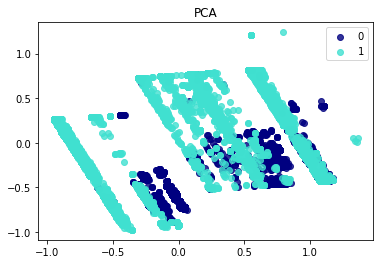

In [149]:
pca = PCA(n_components=2)
X = X_train
X = pca.fit(X).transform(X)
y = y_train
plt.figure()
colors = ['navy', 'turquoise', 'darkorange']
lw = 1
target_names = ['0', '1']
for color, i, target_name in zip(colors, [0, 1], target_names):
    plt.scatter(X[y == i, 0], X[y == i, 1], color=color, alpha=0.8, lw=lw,
                label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('PCA')
plt.show()

In [111]:
gbt.feature_importances_
a = pd.DataFrame({'feature' : list(X_train.columns), 'score' : list(gbt.feature_importances_)})
a.sort_values(by=['score'])

,feature,score
4,jaccard_authors,0.009275
0,edit_authors,0.029494
3,jaro_winkler_authors,0.032637
6,jaccard_year,0.067330
2,edit_year,0.074735
5,jaccard_venue,0.104897
7,diff_year,0.146438
1,edit_venue,0.535194


In [173]:
#Pipeline
G_pred_total = pd.DataFrame(columns=['i', 'j', "answer" ])
center_pred_total = pd.DataFrame(columns=['i', 'j', "answer" ])
merge_center_pred_total = pd.DataFrame(columns=['i', 'j', "answer" ])
mG_pred_total = pd.DataFrame(columns=['i', 'j', "answer" ])

In [174]:
#Pipeline
center_list = list()

In [175]:
#Pipeline
big_G = nx.Graph()
big_mG = nx.Graph()

In [176]:
#Pipeline
def center(center_list):
    cG = nx.Graph()
    center_list = sorted(center_list, reverse=True)
    for elem in center_list:
        centers = [x[0] for x in list(cG.nodes.data('center')) if (x[1] == True)]
        vertices = cG.nodes()
        if elem[0] in centers and elem[1] not in vertices:
            cG.add_edge(elem[0], elem[1])
        elif elem[1] in centers and elem[0] not in vertices:
            cG.add_edge(elem[0], elem[1])
        elif elem[0] in vertices or elem[1] in vertices:
            continue
        else:
            cG.add_node(elem[0], center=True)
            cG.add_edge(elem[0], elem[1])
    return nx.connected_components(cG)

In [177]:
#Pipeline
def merge_center(center_list):
    cG = nx.Graph()
    center_list = sorted(center_list, reverse=True)
    for elem in center_list:
        centers = [x[0] for x in list(cG.nodes.data('center')) if (x[1] == True)]
        vertices = cG.nodes()
        if elem[0] in centers:
            cG.add_edge(elem[0], elem[1])
        elif elem[1] in centers:
            cG.add_edge(elem[0], elem[1])
        elif elem[0] in vertices or elem[1] in vertices:
            continue
        else:
            cG.add_node(elem[0], center=True)
            cG.add_edge(elem[0], elem[1])
    return nx.connected_components(cG)

In [178]:
#Pipeline
valid_dataset = X_test
clf = svc
for k in sorted(test_keys):
    print(k)
    center_list = list()
    G_pred = pd.DataFrame(columns=['i', 'j', "answer" ])
    mG_pred = pd.DataFrame(columns=['i', 'j', "answer" ])
    center_pred = pd.DataFrame(columns=['i', 'j', "answer" ])
    merge_center_pred = pd.DataFrame(columns=['i', 'j', "answer" ])
    block = valid_dataset[valid_dataset['Blocking_key'] == k]
    block = block.drop(['Blocking_key'], axis=1)
    #block = block[['edit_title',
 #'edit_authors',
 #'edit_year',
 #'jaro_winkler_authors',
 #'jaro_winkler_year',
 #'jaccard_title',
 #'jaccard_authors',
 #'jaccard_venue', 'i', 'j']]
    G = nx.Graph()
    mG = nx.Graph()
    for e in range(len(block)):
        row = block.iloc[e]
        i = row['i']
        j = row['j']
        row = row.drop(['i', 'j'])
        pr_ans = clf.predict([row])[0]
        wght = clf.predict_proba([row])[0][1]
        if wght > 0.5:
            center_list.append([i, j])
        mG.add_edge(i, j, weight = wght)
        if pr_ans == 1:
            G.add_edge(i, j)
            print(i, j)
        G_pred = G_pred.append(pd.Series([i, j, 0], index=G_pred.columns), ignore_index=True)
        center_pred = center_pred.append(pd.Series([i, j, 0], index=center_pred.columns), ignore_index=True)
        merge_center_pred = merge_center_pred.append(pd.Series([i, j, 0], index=merge_center_pred.columns), ignore_index=True)
        mG_pred = mG_pred.append(pd.Series([i, j, 0], index=G_pred.columns), ignore_index=True)
    
    
    big_G = nx.disjoint_union(big_G, G) 
    
    #Connected Components
    con_comps = nx.connected_components(G)
    for elem in con_comps:
        comp = sorted(list(elem))
        for i in range(len(comp)):
            for j in range(i + 1, len(comp)):
                index = G_pred[(G_pred['i'] == comp[i]) & (G_pred['j'] == comp[j])].index[0]
                G_pred.at[index, 'answer'] = 1
                
    G_pred_total = G_pred_total.append(G_pred)
    
    
    #Center
    con_comps = center(center_list)
    
    for elem in con_comps:
        comp = sorted(list(elem))
        for i in range(len(comp)):
            for j in range(i + 1, len(comp)):
                index = center_pred[(center_pred['i'] == comp[i]) & (center_pred['j'] == comp[j])].index[0]
                center_pred.at[index, 'answer'] = 1
                
    center_pred_total = center_pred_total.append(center_pred)
    
    
    
    #Merge_Center
    con_comps = merge_center(center_list)
    
    for elem in con_comps:
        comp = sorted(list(elem))
        for i in range(len(comp)):
            for j in range(i + 1, len(comp)):
                index = merge_center_pred[(merge_center_pred['i'] == comp[i]) & (merge_center_pred['j'] == comp[j])].index[0]
                merge_center_pred.at[index, 'answer'] = 1
                
    merge_center_pred_total = merge_center_pred_total.append(merge_center_pred)
    
    
    #Markov Clustering
    matrix = nx.to_scipy_sparse_matrix(mG)
    result = mc.run_mcl(matrix)
    clusters = mc.get_clusters(result)
    for elem in clusters:
        comp = sorted(list(elem))
        for i in range(len(comp)):
            for j in range(i + 1, len(comp)):
                try:
                    index = mG_pred[(mG_pred['i'] == comp[i]) & (mG_pred['j'] == comp[j])].index[0]
                    mG_pred.at[index, 'answer'] = 1
                except Exception:
                    print("Exception")
    mG_pred_total = mG_pred_total.append(mG_pred)

ABOUNDONTHEERROROFCROSSVALIDATIONWITHCONSEQUENCESFORTHETRAININGTESTSPLIT
0 1
0 2
1 2
AGENERALLOWERBOUNDONTHENUMBEROFEXAMPLESNEEDEDFORLEARNING
0 1
0 3
0 4
0 8
0 9
0 10
0 12
0 13
0 15
0 16
0 17
0 18
0 19
0 20
0 21
0 24
0 27
0 29
0 30
0 33
0 35
0 36
0 39
0 40
0 41
1 2
1 3
1 4
1 5
1 6
1 7
1 20
1 24
1 26
1 37
2 4
2 5
2 7
3 4
3 5
3 6
3 7
3 19
3 20
3 24
4 5
4 6
4 7
4 8
4 9
4 10
4 11
4 12
4 20
4 21
4 27
4 29
4 30
4 33
4 35
4 36
4 39
4 40
4 41
5 6
5 7
5 8
5 9
5 10
5 11
5 14
5 20
5 21
5 26
5 27
5 29
5 30
5 31
5 33
5 35
5 36
5 37
5 39
5 40
5 41
6 7
6 13
6 15
6 16
6 17
6 18
6 19
6 20
6 24
6 26
6 31
6 37
7 8
7 9
7 10
7 11
7 14
7 20
7 21
7 26
7 27
7 29
7 30
7 31
7 33
7 35
7 36
7 37
7 39
7 40
7 41
8 9
8 10
8 11
8 12
8 13
8 14
8 15
8 16
8 17
8 18
8 19
8 20
8 21
8 22
8 23
8 24
8 25
8 26
8 27
8 28
8 29
8 30
8 31
8 32
8 33
8 34
8 35
8 36
8 37
8 38
8 39
8 40
8 41
9 10
9 11
9 12
9 13
9 14
9 15
9 16
9 17
9 18
9 19
9 20
9 21
9 22
9 23
9 24
9 25
9 26
9 27
9 28
9 29
9 30
9 31
9 32
9 33
9 34
9 35
9 36
9 37
9 38

29 34
29 35
29 36
29 37
29 38
29 39
30 31
30 32
30 33
30 34
30 35
30 36
30 37
30 38
30 39
31 32
31 33
31 34
31 35
31 36
31 37
31 38
31 39
32 33
32 34
32 35
32 36
32 37
32 38
32 39
33 34
33 35
33 36
33 37
33 38
33 39
34 35
34 36
34 37
34 38
34 39
35 36
35 37
35 38
35 39
36 37
36 38
36 39
37 38
37 39
38 39
APPLYINGTHEWEAKLEARNINGFRAMEWORKTOUNDERSTANDANDIMPROVEC
0 1
0 2
0 3
0 4
0 5
0 6
0 7
1 2
1 3
1 4
1 5
1 6
1 7
2 3
2 4
2 5
2 6
2 7
3 4
3 5
3 7
4 5
4 6
4 7
5 6
5 7
6 7
CRYPTOGRAPHICPRIMITIVESBASEDONHARDLEARNINGPROBLEMS
0 1
0 2
0 3
1 2
1 3
2 3
EFFICIENTDISTRIBUTIONFREELEARNINGOFPROBABILISTICCONCEPTS
0 1
0 2
0 3
0 5
0 6
0 7
0 8
0 9
0 10
0 11
0 12
0 13
0 14
0 15
0 16
0 17
0 18
0 19
0 20
0 21
0 22
0 24
0 29
1 2
1 3
1 4
1 5
1 6
1 7
1 8
1 9
1 10
1 11
1 12
1 13
1 15
1 17
1 18
1 19
1 20
1 21
1 22
1 24
1 29
2 3
2 4
2 5
2 6
2 7
2 8
2 9
2 10
2 11
2 12
2 13
2 14
2 15
2 17
2 18
2 19
2 20
2 21
2 22
2 24
2 29
3 4
3 5
3 6
3 7
3 8
3 9
3 10
3 11
3 12
3 13
3 14
3 15
3 16
3 17
3 18
3 19
3 20
3 21
3 22
3 29
4 

7 9
7 10
7 11
7 12
7 13
7 14
7 15
7 16
7 17
7 18
7 19
7 20
7 21
7 22
7 23
7 24
7 25
7 26
7 27
7 28
7 29
7 30
7 31
7 32
7 33
7 34
7 36
7 43
8 9
8 10
8 11
8 12
8 13
8 14
8 15
8 16
8 17
8 18
8 19
8 20
8 21
8 22
8 23
8 24
8 25
8 26
8 27
8 28
8 29
8 30
8 31
8 32
8 33
8 34
8 37
8 38
8 39
8 40
8 41
8 42
8 44
8 45
8 46
8 47
9 10
9 11
9 12
9 13
9 14
9 15
9 16
9 17
9 18
9 19
9 20
9 21
9 22
9 23
9 24
9 25
9 26
9 27
9 28
9 29
9 30
9 31
9 32
9 33
9 34
9 36
10 11
10 12
10 13
10 14
10 15
10 16
10 17
10 18
10 19
10 20
10 21
10 22
10 23
10 24
10 25
10 26
10 27
10 28
10 29
10 30
10 31
10 32
10 33
10 34
10 36
11 12
11 13
11 14
11 15
11 16
11 17
11 18
11 19
11 20
11 21
11 22
11 23
11 24
11 25
11 26
11 27
11 28
11 29
11 30
11 31
11 32
11 33
11 34
11 36
12 13
12 14
12 15
12 16
12 17
12 18
12 19
12 21
12 22
12 23
12 24
12 25
12 26
12 27
12 28
12 29
12 30
12 31
12 32
12 33
12 34
13 14
13 15
13 16
13 17
13 18
13 19
13 20
13 21
13 22
13 23
13 24
13 25
13 26
13 27
13 28
13 29
13 30
13 31
13 32
13 33
13 34
13 36


10 17
10 18
10 19
10 20
10 21
10 22
10 23
10 24
10 25
10 26
10 27
10 28
10 29
10 30
10 31
10 32
11 12
11 13
11 14
11 15
11 16
11 17
11 18
11 19
11 20
11 21
11 22
11 23
11 24
11 25
11 26
11 27
11 28
11 29
11 30
11 31
11 32
12 13
12 14
12 15
12 16
12 17
12 18
12 19
12 20
12 21
12 22
12 23
12 24
12 25
12 26
12 27
12 28
12 29
12 30
12 31
12 32
13 14
13 15
13 16
13 17
13 18
13 19
13 20
13 21
13 22
13 23
13 24
13 25
13 26
13 27
13 28
13 29
13 30
13 31
13 32
14 15
14 16
14 17
14 18
14 19
14 20
14 21
14 22
14 23
14 24
14 25
14 27
14 28
14 30
14 31
14 32
15 16
15 17
15 18
15 19
15 20
15 21
15 22
15 23
15 24
15 25
15 27
15 28
15 30
15 31
15 32
16 17
16 18
16 19
16 20
16 21
16 22
16 23
16 24
16 25
16 26
16 27
16 28
16 29
16 30
16 31
16 32
17 18
17 19
17 20
17 21
17 22
17 23
17 24
17 25
17 26
17 27
17 28
17 29
17 30
17 31
17 32
18 19
18 20
18 21
18 22
18 23
18 24
18 25
18 26
18 27
18 28
18 29
18 30
18 31
18 32
19 20
19 21
19 22
19 23
19 24
19 25
19 26
19 27
19 28
19 29
19 30
19 31
19 32
20 21
20 2

In [179]:
#Pipeline
X_test = X_test.drop(['i', 'j', 'Blocking_key'], axis=1)

In [180]:
#Pipeline
f1_score(y_test, list(G_pred_total['answer']))

0.9024017270846452

In [181]:
#Pipeline
f1_score(y_test, list(center_pred_total['answer']))

0.9206086326467239

In [182]:
#Pipeline
f1_score(y_test, list(merge_center_pred_total['answer']))

0.9435606060606061

In [183]:
#Pipeline
f1_score(y_test, list(mG_pred_total['answer']))

0.942768536791655

In [184]:
#Pipeline
f1_score(y_test, clf.predict(X_test))

0.9236356090475203

In [185]:
#Pipeline
recall_score(y_test, list(G_pred_total['answer']))

1.0

In [186]:
#Pipeline
recall_score(y_test, list(center_pred_total['answer']))

0.8865629984051037

In [187]:
#Pipeline
recall_score(y_test, list(merge_center_pred_total['answer']))

0.9932216905901117

In [188]:
#Pipeline
recall_score(y_test, list(mG_pred_total['answer']))

1.0

In [191]:
#Pipeline
recall_score(y_test, clf.predict(X_test))

0.8873604465709729